In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
from Triangles import *

{('a', 'b'): Text(0.2489699592547483, -0.48047178893507986, '1'),
 ('a', 'c'): Text(0.19929981732141439, -0.4986727084213231, '1'),
 ('a', 'd'): Text(0.00019292421570649143, 5.2626976284719795e-05, '-1'),
 ('a', 'e'): Text(0.1476766638506843, -0.5207502486910275, '1'),
 ('b', 'c'): Text(0.05084353348112705, 0.020750248691027578, '1'),
 ('b', 'd'): Text(-0.14826335962458081, 0.5194755840886354, '1'),
 ('c', 'd'): Text(-0.19793350155791473, 0.5012746646023922, '1'),
 ('d', 'e'): Text(-0.24955665502864482, 0.47919712433268774, '1')}

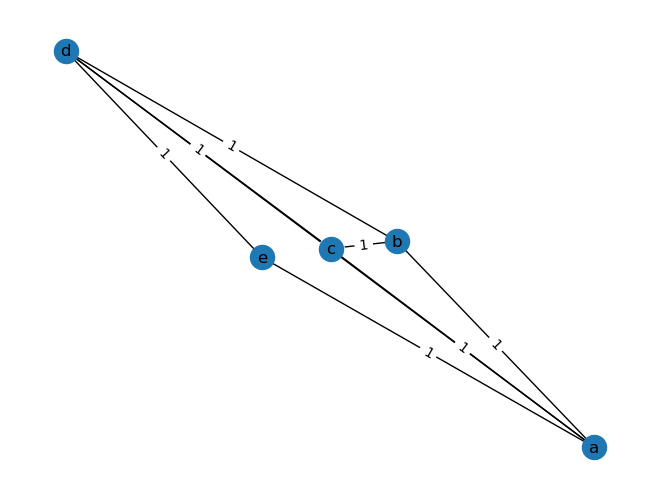

In [14]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd', "e"]
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b', weight= 1)
G.add_edge("b", "c", weight= 1)
G.add_edge("a", "c", weight= 1)

G.add_edge("a", "d", weight=-1)
G.add_edge("c", "d", weight=1)
G.add_edge("a", "e", weight=1)
G.add_edge("d", "e", weight=1)

G.add_edge("d", "b", weight=1)
# draw the graph
pos = nx.spring_layout(G, seed=2)
nx.draw(G, pos=pos,with_labels=True )
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#nx.draw(G, with_labels=True)

In [3]:
triangle_nodes= triangle_list(G)
assert(len(triangle_nodes)==triads(G))

In [4]:
triangle_nodes

[['a', 'b', 'c'],
 ['a', 'b', 'd'],
 ['a', 'c', 'd'],
 ['a', 'd', 'e'],
 ['b', 'c', 'd']]

In [5]:
tri = nx.triangles(G)
print(tri)
tri_total=np.array(list(tri.values())).sum()//3
print("number of triangles: {} ".format(tri_total))

{'a': 4, 'b': 3, 'c': 3, 'd': 4, 'e': 1}
number of triangles: 5 


In [6]:
#tri_list=[c for c in nx.cycle_basis(G) if len(c)==3]
tri_list=[c for c in nx.enumerate_all_cliques(G) if len(c)==3] 
print("observed triangles: {}".format(tri_list))
print("number of observed triangles: {}".format(len(tri_list))) #triangle b,c,a missing

observed triangles: [['a', 'b', 'c'], ['a', 'b', 'd'], ['a', 'c', 'd'], ['a', 'd', 'e'], ['b', 'c', 'd']]
number of observed triangles: 5


In [7]:
assert tri_total==len(tri_list) #shouldn't it result in the same number of triangles?

In [8]:
n_ub, n_wb, n_sb, Ntri = triad_types(G)
print("unbalanced: {}".format(n_ub))
print("weakly balanced: {}".format(n_wb))
print("strongly balanced: {}".format(n_sb))

unbalanced: 3
weakly balanced: 0
strongly balanced: 2


In [9]:
group_labels=np.array([1,1,1,0,0])
cbi = CBI(G, group_labels)

In [11]:
cbi

40.0

In [10]:
cli_3_list=[]
start=time.time()
for each_clique_all_size in nx.enumerate_all_cliques(G) :
    if len(each_clique_all_size) <3:

        continue

    elif len(each_clique_all_size) == 3:


        cli_3_list.append(sorted(each_clique_all_size))
    
    else:
        break   # this stops after size 3 is done
        
print("time: {} s".format(time.time()-start) )

time: 0.0 s
